In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Procedure

**1. Import Data**

In [4]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [5]:
df = pd.read_csv('/drive/My Drive/DataSet/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


*About Data* :
* This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


*Variables* : 
*   id - Unique ID for each home sold
*   date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedroom
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not.
* view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment.
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level.
* sqft_basement - The square footage of the interior housing space that is below ground level.
* yr_built - The year the house was initially built.
* yr_renovated - The year of the house’s last renovation.
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


**2. Check dataset size**

In [6]:
df.shape

(21613, 21)

**3. Find and treat missing values (If any)**

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**4. Check column types and describe which columns are numerical, or categorical**

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['yr_sold'] = df['date'].dt.year

In [9]:
def map_grade(grade):
    if grade <= 3:
        return "short"
    elif grade <= 10:
        return "average"
    else:
        return "high"

df["grade"] = df["grade"].apply(map_grade)

In [10]:
def contains_half(value):
    if ".5" in str(value):
        return 1
    else:
        return 0
    
df["shower"] = df["bathrooms"].apply(contains_half)

In [11]:
def reno(value):
    if value==0:
        return 0
    else:
        return 1
    
df["renovated"] = df["yr_renovated"].apply(reno)

In [12]:
df['floors'] =df['floors'].astype(int)

In [13]:
df['zipcode'] =df['zipcode'].astype(str)

In [14]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,shower,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,1,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,1,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,0


In [15]:
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
print(numeric_columns)


['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold', 'shower', 'renovated']


In [16]:
categorical_columns = [col for col in df.columns if pd.api.types.is_string_dtype(df[col])]
print(categorical_columns)

['grade', 'zipcode']


**5. Perform Univariate analysis**

*1. Calculate mean, median, std dev, and quartiles of numerical data*

In [17]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_sold,shower,renovated
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,0.355064,0.042289
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,0.467616,0.478544,0.201253
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,1.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,1.000000,1.000000


*2. Plot histogram for a few categorical variables*

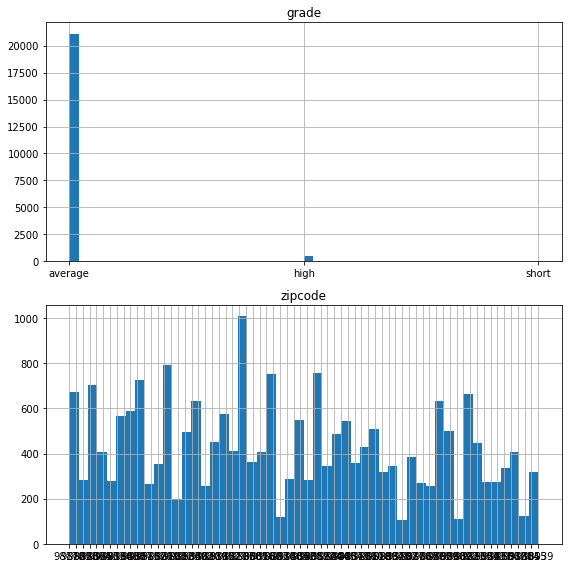

In [18]:
fig, ax = plt.subplots(len(categorical_columns), figsize=(8, 8))

for i, col in enumerate(categorical_columns):
    df[col].hist(bins=50, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

*3. Check the distribution of numerical variables and comment on it*

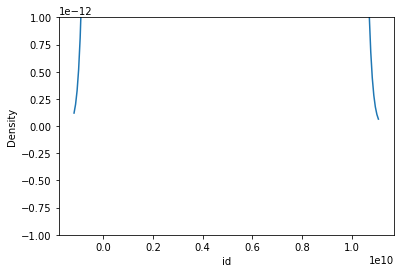

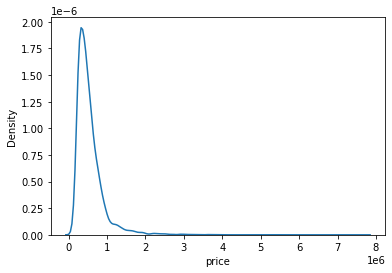

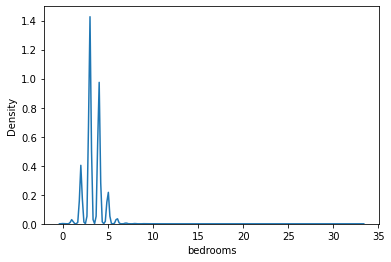

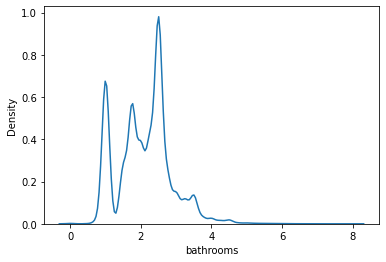

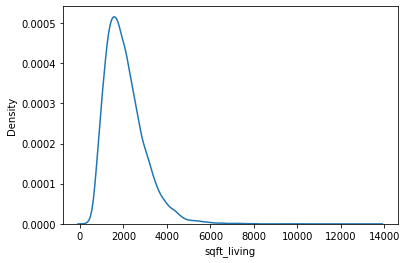

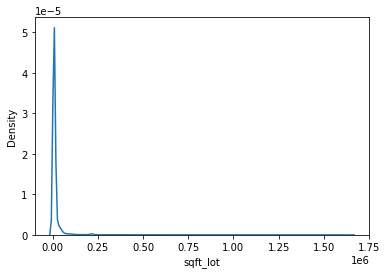

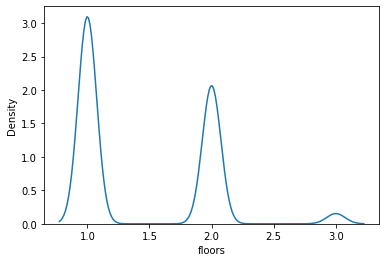

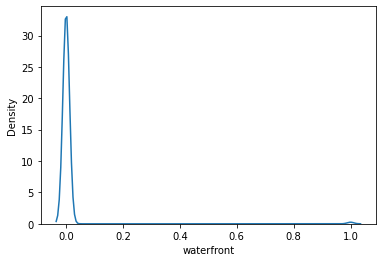

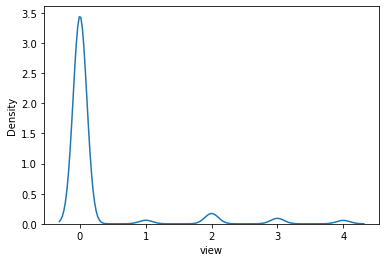

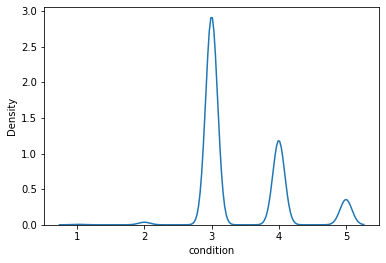

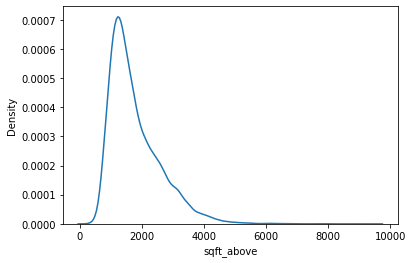

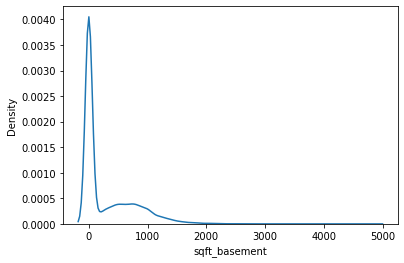

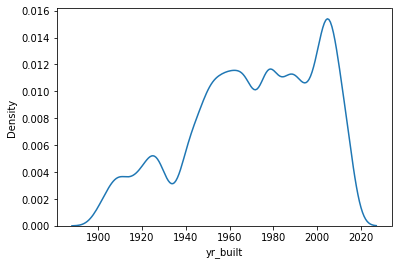

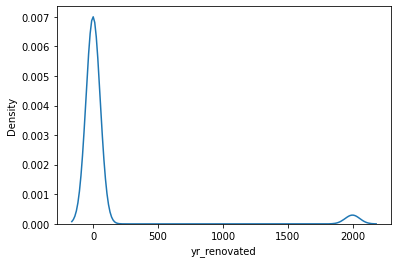

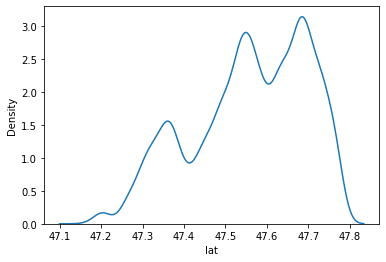

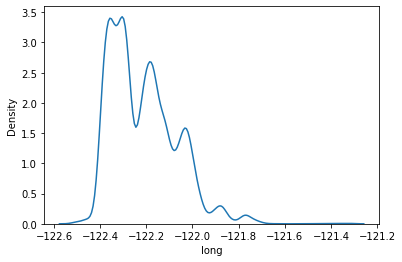

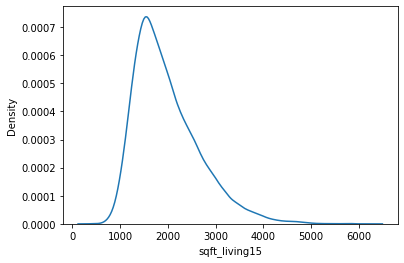

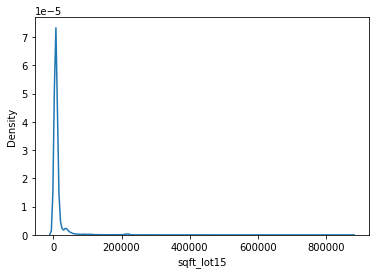

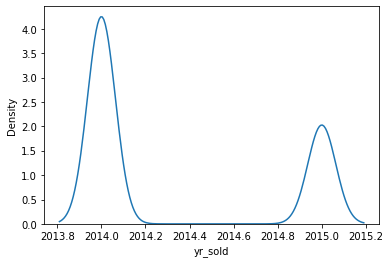

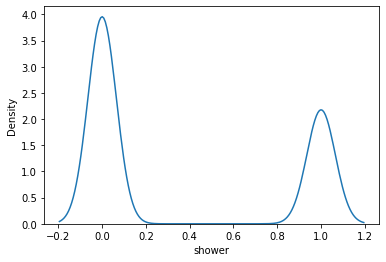

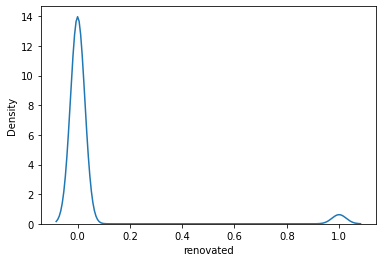

In [19]:
for i in numeric_columns:
  sns.kdeplot(df[i])
  plt.show()

**6. Perform Bivariate analysis**

*1. Plot pair plots*

In [ ]:
sns.pairplot(df)

*2. Perform a Chi-square analysis to check whether there is a relationship between*

In [ ]:
from scipy.stats import chi2_contingency




*   view and waterfront



In [ ]:
pd.crosstab(df['view'],df['waterfront'])



*   condition and grade



In [ ]:
pd.crosstab(df['condition'],df['grade'])

*3.Calculate Pearson correlation, and plot their heatmap*

In [ ]:
sns.heatmap(df.corr(),annot = True)

**7. Drop any unnecessary columns**

In [ ]:
df.drop(['id','date','yr_renovated'],axis =1,inplace=True)

*Outlier Analysis*

In [ ]:
continuos_col = ['price', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
# Outliers visibility before removal
for c in continuos_col:
    plt.figure()
    sns.boxplot(y=c, data=df)

In [ ]:
# Capping outliers in continuos col

for c in continuos_col:
  percentiles25 = df[c].quantile(0.25)
  percentiles75 = df[c].quantile(0.75)
  iqr = percentiles75-percentiles25
  upper_limit = percentiles75 + (1.5*iqr)
  lower_limit = percentiles25 - (1.5*iqr)
  df[c] = np.where(
      df[c] > upper_limit,
      upper_limit,
      np.where(
          df[c] < lower_limit,
          lower_limit,
          df[c]
          )
      )

In [ ]:
# Outliers visibility after removal
for c in continuos_col:
    plt.figure()
    sns.boxplot(y=c, data=df)

**8.One hot encode categorical variables (if any)**

In [ ]:
df= pd.get_dummies(df,columns = categorical_columns,drop_first=True)
df

**9. Split into train and test set**

In [ ]:
x = df.drop('price',axis =1).values 
x

In [ ]:
y = df['price'].values
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.15,random_state=2)

**10. Scale the variables**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_train

In [ ]:
x_test=sc.transform(x_test)
x_test

**11. Train multiple models like Linear regression, Decision Tree, Random Forest, SVR, etc.**

*Linear Regression*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)


print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R2 score',r2)

*Decision Tree Regressor*

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R2 score',r2)

*Random Forest Regressor*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R2 score',r2)


*Support Vector Regression (SVR)*

In [ ]:
from sklearn.svm import SVR 

svr = SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R2 score',r2)

**12. Check their performance, and comment on which is the best model**

*Random Forest Regressor is the best model as its value of 0.8946 is higher among other models.*

**13. Check whether Linear regression performance is good or not**

*R2 (coefficient of determination) is a measure of how well the model fits the data. It takes on a value between 0 and 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any of the variability in the data. A value of 0.8596 is generally considered to be a good fit.*

**14. Check for Multi-collinearity (Hint: Use VIF)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] =X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

  

In [ ]:
X = df.iloc[:,1:]
vif = calc_vif(X)
vif

**15. Remove columns with high multi-collinearity (If any)**

In [ ]:
high_vif_predictors = vif[vif["VIF"] > 10]["variables"]
high_vif_predictors

In [ ]:
df1 = df.copy(deep=True)

In [ ]:
df1.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','sqft_above','sqft_basement','yr_built','lat',
 'long','sqft_living15','sqft_lot15','yr_sold','zipcode_98033','zipcode_98034','zipcode_98052','zipcode_98053',
 'zipcode_98072','zipcode_98074','zipcode_98103','zipcode_98115','zipcode_98117','zipcode_98125','zipcode_98133',
 'zipcode_98155'],axis =1,inplace=True)

**16. Re-run all the models and check the performance**

In [ ]:
x = df1.drop('price',axis =1).values 
x

In [ ]:
y = df1['price'].values
y

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [ ]:
x_train=sc.fit_transform(x_train)
x_train

In [ ]:
x_test=sc.transform(x_test)
x_test

*Linear Regression*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)


print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R2 score',r2)

*Decision Tree Regressor*

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R2 score',r2)

*Random Forest Regressor*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R2 score',r2)

*Support Vector Regression (SVR)*

In [ ]:
from sklearn.svm import SVR 

svr = SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R2 score',r2)

# Compulsory

**1. Use grid search CV to tune the hyperparameter of the best model**

In [56]:
X = df.drop('price',axis =1).values
Y = df['price'].values

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [58]:
X_train=sc.fit_transform(X_train)
X_train

array([[-1.46464562, -1.44278201, -1.00570309, ..., -0.0804033 ,
         8.61922175, -0.12097947],
       [-0.39196962,  0.18086257, -0.39649274, ..., -0.0804033 ,
        -0.11601976, -0.12097947],
       [-0.39196962, -1.44278201, -1.01764839, ..., -0.0804033 ,
        -0.11601976, -0.12097947],
       ...,
       [ 0.68070637,  1.47977823,  1.65809904, ..., -0.0804033 ,
        -0.11601976, -0.12097947],
       [-1.46464562, -0.79332418, -1.41184332, ..., -0.0804033 ,
        -0.11601976, -0.12097947],
       [-0.39196962,  0.50559149,  0.91749038, ..., -0.0804033 ,
        -0.11601976, -0.12097947]])

In [59]:
X_test=sc.transform(X_test)
X_test

array([[ 0.68070637,  0.18086257,  0.42773304, ..., -0.0804033 ,
        -0.11601976, -0.12097947],
       [-0.39196962, -0.79332418,  0.14104581, ..., -0.0804033 ,
        -0.11601976, -0.12097947],
       [-1.46464562, -1.44278201, -0.71901586, ..., -0.0804033 ,
        -0.11601976, -0.12097947],
       ...,
       [-1.46464562,  0.18086257, -0.70707056, ..., -0.0804033 ,
        -0.11601976, -0.12097947],
       [ 0.68070637,  3.10342282,  2.19563759, ..., -0.0804033 ,
        -0.11601976, -0.12097947],
       [-0.39196962,  0.50559149,  0.39189713, ..., -0.0804033 ,
        -0.11601976, -0.12097947]])

In [60]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [61]:
n_estimators = [10, 50, 100]
random_state = [0,10,None]
max_samples = [0.5, 1.0]
max_features= [0.5, 1.0]
max_depth= [None, 5, 15]

In [62]:
param_grid = {'n_estimators': n_estimators,
              'random_state': random_state,
              'max_samples' : max_samples,
              'max_features': max_features,
              'max_depth': max_depth
             }
print(param_grid)

{'n_estimators': [10, 50, 100], 'random_state': [0, 10, None], 'max_samples': [0.5, 1.0], 'max_features': [0.5, 1.0], 'max_depth': [None, 5, 15]}


In [63]:
from sklearn.model_selection import GridSearchCV

rfr_grid = GridSearchCV(estimator = rfr, 
                       param_grid = param_grid, 
                       cv = 5)

In [64]:
rfr_grid.fit(X,Y) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 15], 'max_features': [0.5, 1.0],
                         'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100],
                         'random_state': [0, 10, None]})

In [65]:
rfr_grid.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [67]:
rfr_grid.best_score_

0.8880622693389661

**2.Train a polynomial regression model with degree 2, and 3 and compare its performance with other models**

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [69]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

-5.616967214063187e+21


In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))